In [2]:
import numpy as np
from sklearn.manifold import TSNE #Dimensionality reduction and data visualization
import matplotlib.pyplot as plt

# Downloading the wordvectors

In [6]:
import gensim.downloader as api

In [7]:
word2vec_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


# vector representation of a word

In [8]:
word2vec_model['beautiful']

array([-0.01831055,  0.05566406, -0.01153564,  0.07275391,  0.15136719,
       -0.06176758,  0.20605469, -0.15332031, -0.05908203,  0.22851562,
       -0.06445312, -0.22851562, -0.09472656, -0.03344727,  0.24707031,
        0.05541992, -0.00921631,  0.1328125 , -0.15429688,  0.08105469,
       -0.07373047,  0.24316406,  0.12353516, -0.09277344,  0.08203125,
        0.06494141,  0.15722656,  0.11279297, -0.0612793 , -0.296875  ,
       -0.13378906,  0.234375  ,  0.09765625,  0.17773438,  0.06689453,
       -0.27539062,  0.06445312, -0.13867188, -0.08886719,  0.171875  ,
        0.07861328, -0.10058594,  0.23925781,  0.03808594,  0.18652344,
       -0.11279297,  0.22558594,  0.10986328, -0.11865234,  0.02026367,
        0.11376953,  0.09570312,  0.29492188,  0.08251953, -0.05444336,
       -0.0090332 , -0.0625    , -0.17578125, -0.08154297,  0.01062012,
       -0.04736328, -0.08544922, -0.19042969, -0.30273438,  0.07617188,
        0.125     , -0.05932617,  0.03833008, -0.03564453,  0.24

# similar words for given word with vectors

In [11]:
word2vec_model.most_similar('girl')

[('boy', 0.8543272018432617),
 ('teenage_girl', 0.7927976250648499),
 ('woman', 0.7494640946388245),
 ('teenager', 0.7172499299049377),
 ('schoolgirl', 0.7075953483581543),
 ('teenaged_girl', 0.6650916337966919),
 ('daughter', 0.6489864587783813),
 ('mother', 0.6478164196014404),
 ('toddler', 0.6473966836929321),
 ('girls', 0.6154742240905762)]

# queen - girl + boy = king

In [12]:
word2vec_model.most_similar(positive = ['queen','boy'],negative = ['girl'],topn = 1) #displays only 1 similiar value

[('king', 0.7298422455787659)]

In [24]:
vocab = ['boy','girl','man','woman','king','queen','banana','apple','mango','fruit','coconut','orange']

def tsne_plot(model):
    labels = []
    word2vecs = []
    
    for word in vocab:
        word2vecs.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity = 3,n_components = 2,init = 'pca',random_state = 42)
    coordinates = tsne_model.fit_transform(word2vecs)
    
    X = []
    Y = []
    for value in coordinates:
        X.append(value[0])
        Y.append(value[1])
        
        
    plt.figure(figsize = (8,8))
    
    for i in range(len(X)):
        plt.scatter(X[i],Y[i])
        
        plt.annotate(labels[i],
                     xy = (X[i],Y[i]),
                     xytext = (2,2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
        """
        plt.annotate(labels[i],
                     xy=(X[i], Y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
                    """
    plt.show()

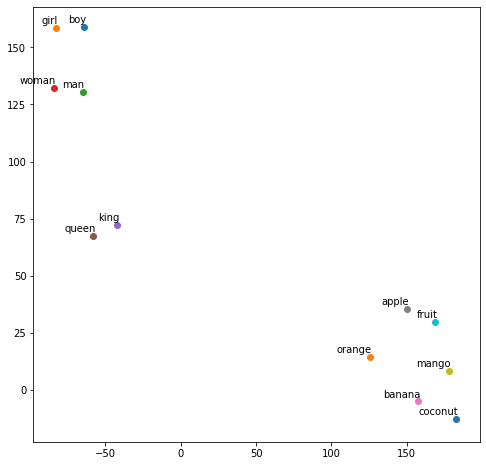

In [25]:
tsne_plot(word2vec_model)